In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
train = pd.read_csv('Final_Train_Dataset.csv')
test = pd.read_csv('Final_Test_Dataset.csv')
dataset = pd.concat([train, test], sort=False)

In [3]:
dataset.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0.0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1.0,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2.0,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3.0,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4.0,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [4]:
dataset.shape

(26403, 9)

In [5]:
dataset = dataset.iloc[:, 1:]
dataset.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [6]:
dataset['job_type'].value_counts()

Analytics    5033
analytics    1220
ANALYTICS     106
analytic       47
Analytic       28
Name: job_type, dtype: int64

In [7]:
dataset = dataset.drop(['job_type'], axis = 1)

In [8]:
dataset['exp'] = dataset['experience'].str.split(' ').str[0]

dataset['exp_lo'] = dataset['exp'].str.split('-').str[0]
dataset['exp_lo'] = dataset['exp_lo'].astype(int)
dataset['exp_up'] = dataset['exp'].str.split('-').str[1]
dataset['exp_up'] = dataset['exp_up'].astype(int)

In [9]:
dataset.dtypes

experience              object
job_description         object
job_desig               object
key_skills              object
location                object
salary                  object
company_name_encoded     int64
exp                     object
exp_lo                   int32
exp_up                   int32
dtype: object

In [10]:
dataset.isnull().sum()

experience                 0
job_description         5940
job_desig                  0
key_skills                 1
location                   0
salary                  6601
company_name_encoded       0
exp                        0
exp_lo                     0
exp_up                     0
dtype: int64

In [11]:
dataset = dataset.drop(['experience', 'exp'], axis=1)

In [12]:
dataset.groupby('location')['location'].count()

location
Across India                                                                            12
Adilabad, Afghanistan                                                                    1
Afghanistan                                                                              7
Africa, Lubumbashi                                                                       1
Agartala, Adilabad, Agra, Ahmednagar, Aizawl, Ajmer, Aligarh, Allahabad, Alwar           2
                                                                                        ..
other city                                                                               1
pauri, pithoragarh, rudraprayag, uttarkashi, chatra, deogar, dumka, garhwa, godda        3
rajasthan, haryana                                                                       2
riyadh, Saudi Arabia                                                                     1
rohtas, samastipur, chhapra, sheohar, sitamarhi, supaul, hajipur, bettiah, firoza

In [13]:
dataset['location'].unique()

array(['Delhi NCR(Vikas Puri)', 'Sonepat', 'Delhi NCR', ..., 'Alwar',
       'Pune, Sangamner', 'Pune, UK, United Kingdom (U.K)'], dtype=object)

In [14]:
dataset['location_1']=dataset['location'].str.split(',').str[0]
dataset['location_2']=dataset['location'].str.split(',').str[1]
dataset['location_3']=dataset['location'].str.split(',').str[2]
dataset['location_4']=dataset['location'].str.split(',').str[3]
dataset['location_5']=dataset['location'].str.split(',').str[4]

In [15]:
dataset['location_1'].unique()

array(['Delhi NCR(Vikas Puri)', 'Sonepat', 'Delhi NCR', 'Bengaluru',
       'Gurgaon', 'Noida', 'Pune', 'Ahmedabad(Bodakdev)',
       'Bengaluru(Kodihalli)', 'Mohali', 'Pune(Kharadi)', 'Mumbai',
       'Chennai', 'Chandigarh', 'Ahmedabad(Bopal)', 'Bhubaneshwar',
       'Hyderabad', 'Mumbai(Airoli)', 'Navi Mumbai', 'Udaipur',
       'Across India', 'Indore', 'Ahmedabad', 'Noida(Sector-127 Noida)',
       'Dehradun', 'Pune(Shikrapur)', 'Dubai', 'Anywherein India',
       'Noida(Sector-1 Noida)', 'Delhi', 'Kolkata', 'Qatar',
       'Bengaluru(Whitefield)', 'Bengaluru(4th Block Koramangala)',
       'Bengaluru(Sector 1 HSR Layout+7)', 'Bengaluru(Anepalya)',
       'Uganda', 'Africa', 'Delhi NCR(Gwal Pahari)',
       'Mumbai(Lower Parel)', 'Noida(Sector-63 Noida)', 'Bidar', 'Kochi',
       'Hyderabad(Begumpet)', 'Bengaluru(Shivaji Nagar)', 'Pune(NIBM)',
       'Nagpur', 'Chennai(GST Road)', 'Pune(Koregaon Park)', 'EU',
       'Valsad', 'Gurgaon(Cyber City)', 'Bahraich', 'Mumbai(Powai)',
   

In [16]:
dataset['location_1']=dataset['location_1'].str.split('(').str[0]

In [17]:
dataset['location_2'].unique()

array([nan, ' Gurgaon', ' Gurugram', ' Mumbai Suburbs', ' Noida',
       ' Delhi', ' Chandigarh', ' Ajmer', ' Hyderabad', ' Delhi NCR',
       ' Bengaluru', ' Bhavnagar', ' Trivandrum', ' Mumbai', ' Kochi',
       ' Chennai', ' Lubumbashi', ' Kanpur', ' Mohali',
       ' Noida/Greater Noida', ' Ukraine', ' Saharanpur', ' Navi Mumbai',
       ' Orai', ' Hong Kong', ' etah', ' Salem', ' Pune', ' chennai',
       ' Chennai City', ' Australia', ' Kolkata', ' Yangon', ' Hospet',
       ' Greater Noida', ' Singapore', ' Malappuram', ' Ludhiana',
       ' Gujarat', ' Ghaziabad', ' Noida(Sector-2 Noida)', ' Jaipur',
       ' Dubai/ UAE', ' Erode', ' Alwar', ' Bhubaneshwar', ' Coimbatore',
       ' Eindhoven', ' Canada', ' Middle East', ' Kerala', ' Bawal',
       ' Visakhapatnam', ' Vijayawada', ' Valsad', ' abu dhabi',
       ' Bengaluru / Bangalore', ' Ahmedabad', ' Pune(Yerwada)',
       ' Dhanbad', ' Vellore', ' Cuddalore', ' pithoragarh',
       ' United Kingdom (U.K)', ' Ganganagar', ' V

In [18]:
dataset['location_2']=dataset['location_2'].str.split('(').str[0]

In [19]:
dataset['location_3'].unique()

array([nan, ' Ludhiana', ' Kota', ' Kolkata', ' Chennai', ' Navi Mumbai',
       ' Bhubaneshwar', ' Hyderabad', ' Kochi', ' Bengaluru',
       ' Trivandrum', ' Noida', ' Panchkula', ' Pune', ' Imphal',
       ' etawah', ' Trichy', ' Germany', ' Ahmedabad', ' Koppal',
       ' Chandigarh', ' Gurugram', ' Jalandhar', ' Gurgaon', ' Delhi',
       ' Delhi NCR', ' Thanjavur', ' Madurai', ' Visakhapatnam',
       ' Thiruvananthapuram', ' Daman & Diu', ' Mysore', ' Thane',
       ' Hisar', ' rudraprayag', ' Dubai/ UAE', ' Mumbai',
       ' Sriperumbudur', ' Gujarat', ' Canada', ' Karimnagar',
       ' Vadodara', ' Nasik', ' Kuwait', ' Vapi', ' Raigad', ' Hong Kong',
       ' Faridabad', ' Mumbai Suburbs', ' Roorkee', ' chhapra', ' khunti',
       ' Khammam', ' Ghaziabad', ' Jaipur', ' Karur', ' Satna', ' Tumkur',
       ' Mandi', ' Udaipur', ' Kanpur', ' auraiya', ' Agra', ' Rajkot',
       ' Pendra', ' barddhaman', ' Vijayawada', ' Malaysia', ' Salem',
       ' Anand', ' Australia', ' United

In [20]:
dataset['location_3']=dataset['location_3'].str.split('(').str[0]

In [21]:
dataset['location_4'].unique()

array([nan, ' Sangrur', ' Pune', ' Bhuj', ' Gurgaon', ' Delhi NCR',
       ' Kolkata', ' Nagpur', ' Idukki', ' faizabad', ' Coimbatore',
       ' Chennai', ' Dubai/ UAE', ' Mysore', ' Thane', ' Thanjavur',
       ' Hyderabad', ' Trivandrum', ' Mumbai', ' Ahmedabad',
       ' uttarkashi', ' Ghaziabad', ' Neemrana', ' Bengaluru', ' Delhi',
       ' Varanasi', ' sheohar', ' koderma', ' Warangal', ' Noida',
       ' Nasik', ' Visakhapatnam', ' Koppal', ' Manesar', ' Allahabad',
       ' baghpat', ' Greater Noida', ' Udaipur', ' Rajim', ' Navi Mumbai',
       ' birbhum', ' Gurugram', ' Faridabad', ' Bokaro', ' Sahadnagar',
       ' Belgaum', ' Bharuch', ' ghazipur', ' Ludhiana', ' Banur',
       ' Bhiwani', ' Pathankot', ' pilibhit', ' Amravati', ' cachar',
       ' Vadodara', ' Hisar', ' Hoshiarpur', ' begusarai', ' Guntur',
       ' Kullu/Manali', ' Jaipur', ' Ahmednagar', ' sivasagar',
       ' Jalandhar', ' Chandigarh', ' Gwalior', ' Kala', ' mahoba',
       ' Kanpur', ' Anand', ' Pondi

In [22]:
dataset['location_4']=dataset['location_4'].str.split('(').str[0]

In [23]:
dataset['location_5'].unique()

array([nan, ' Aurangabad', ' Noida', ' Port Blair', ' Gurgaon', ' Agra',
       ' Jind', ' Indore', ' fatehpur', ' Vellore', ' Hyderabad',
       ' New Zealand', ' Shimoga', ' Trivandrum', ' Mumbai', ' Panjim',
       ' Tirunelveli', ' Kolkata', ' Kanpur', ' chatra', ' Ahmedabad',
       ' Pune', ' Nizamabad', ' Greater Noida', ' Faridabad', ' Satna',
       ' sitamarhi', ' pakur', ' Vijayawada', ' Kozhikode', ' Mamandur',
       ' Jhansi', ' ballia', ' Vadodara', ' Shivrinarayan', ' balurghat',
       ' Dibrugarh', ' Thrissur', ' Narsampet', ' Bhopal', ' Bhavnagar',
       ' sitapur', ' Patna', ' Baramati', ' Raipur', ' Lucknow', ' Jammu',
       ' Paradeep', ' Delhi', ' Surat', ' Cuttack', ' sambhal',
       ' Dehradun', ' Amritsar', ' chirang', ' Kuwait', ' Shimla',
       ' Hospet', ' Bengaluru', ' banka', ' Hosur', ' Muzaffarpur',
       ' Jodhpur', ' Aizawl', ' tezpur', ' Ghaziabad', ' Chennai',
       ' Jaisalmer', ' Hisar', ' Jaipur', ' Kalpakkam', ' mainpuri',
       ' Navi Mu

In [24]:
dataset['location_5']=dataset['location_5'].str.split('(').str[0]

In [25]:
dataset['location_1'].fillna("None",inplace=True)
dataset['location_2'].fillna("None",inplace=True)
dataset['location_3'].fillna("None",inplace=True)
dataset['location_4'].fillna("None",inplace=True)
dataset['location_5'].fillna("None",inplace=True)

In [26]:
dataset.shape

(26403, 13)

In [27]:
def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [28]:
dataset['location_1'].value_counts().nlargest(10)

Bengaluru    6740
Mumbai       4346
Gurgaon      2773
Delhi NCR    2329
Pune         1965
Chennai      1718
Hyderabad    1718
Noida         902
Delhi         508
Ahmedabad     361
Name: location_1, dtype: int64

In [29]:
top_10 = [x for x in dataset.location_1.value_counts().sort_values(ascending=False).head(10).index]

In [30]:
one_hot_top_x(dataset,'location_1',top_10)

In [31]:
dataset['location_2'].value_counts().nlargest(10)

None               22178
 Gurgaon             714
 Bengaluru           402
 Mumbai              330
 Gurugram            318
 Hyderabad           214
 Noida               211
 Mumbai Suburbs      208
 Chennai             197
 Pune                196
Name: location_2, dtype: int64

In [32]:
top_8 = [x for x in dataset.location_2.value_counts().sort_values(ascending=False).head(8).index]

In [33]:
one_hot_top_x(dataset,'location_2',top_8)

In [34]:
dataset['location_3'].value_counts().nlargest(10)

None            24813
 Noida            166
 Bengaluru        151
 Gurgaon          133
 Hyderabad        114
 Pune              99
 Navi Mumbai       81
 Chennai           73
 Gurugram          47
 Mumbai            45
Name: location_3, dtype: int64

In [35]:
top_4 = [x for x in dataset.location_3.value_counts().sort_values(ascending=False).head(4).index]

In [36]:
one_hot_top_x(dataset,'location_3',top_4)

In [37]:
dataset['location_4'].value_counts().nlargest(10)

None          25904
 Hyderabad       56
 Chennai         47
 Pune            46
 Gurgaon         21
 Mumbai          21
 Kolkata         17
 Noida           17
 Ghaziabad       14
 Thane           13
Name: location_4, dtype: int64

In [38]:
top_3 = [x for x in dataset.location_4.value_counts().sort_values(ascending=False).head(3).index]

In [39]:
one_hot_top_x(dataset,'location_4',top_3)

In [40]:
dataset['location_5'].value_counts().nlargest(10)

None          26037
 Pune            36
 Hyderabad       33
 Gurgaon         27
 Kolkata         21
 Noida           14
 Chennai         12
 Faridabad       11
 Lucknow         10
 Mumbai           9
Name: location_5, dtype: int64

In [41]:
top_2 = [x for x in dataset.location_5.value_counts().sort_values(ascending=False).head(2).index]

In [42]:
one_hot_top_x(dataset,'location_5',top_2)

In [43]:
dataset.drop(['location_1','location_2','location_3','location_4','location_5'], inplace= True, axis =1)

In [44]:
dataset.drop(['location'], inplace= True,axis =1)

In [45]:
dataset.head()

,job_description,job_desig,key_skills,salary,company_name_encoded,exp_lo,exp_up,location_1_Bengaluru,location_1_Mumbai,location_1_Gurgaon,...,location_2_ Mumbai Suburbs,location_3_None,location_3_ Noida,location_3_ Bengaluru,location_3_ Gurgaon,location_4_None,location_4_ Hyderabad,location_4_ Chennai,location_5_None,location_5_ Pune
0,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,"team skills, communication skills, analytical ...",6to10,3687,5,7,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,He should have handled a team of atleast 5-6 d...,Head SCM,"ppc, logistics, inventory management, supply c...",10to15,458,10,17,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,"HR Analytics, Employee Engagement, Training, S...",15to25,4195,5,9,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,"SQL, Javascript, Automation, Python, Ruby, Ana...",10to15,313,7,10,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,"accounting, finance, cash flow, financial plan...",3to6,1305,1,3,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [46]:
dataset['job_desig'].value_counts().nlargest(40)

Business Analyst                                                        204
Data Scientist                                                          117
Data Analyst                                                             86
Product Manager                                                          76
Home Base Job/ Data Entry/online Work/part Time Work/freelancer work     74
Digital Marketing Manager                                                73
Digital Marketing Executive                                              58
Analyst                                                                  53
SEO Executive                                                            47
Microsoft Advanced Analytics                                             40
Application Developer                                                    40
Associate                                                                38
SEO Analyst                                                              36
Content Writ

In [47]:
top_50 = [x for x in dataset.job_desig.value_counts().sort_values(ascending=False).head(50).index]

In [48]:
one_hot_top_x(dataset,'job_desig',top_50)

In [49]:
dataset.drop(['job_desig'], inplace= True,axis =1)

In [50]:
dataset['key_skills'].value_counts().nlargest(24)

part time, freelancing, data entry, present job, work from home...                107
SAS, Sdtm, Adam, Statistical Programming, Statistics, Life Sciences...             25
data entry operation, typing, excel, notepad, freelancing, content writing,...     24
business analysis, System Analyst, Business Analyst...                             24
Fraud Analytics, People Management Skills, Team Leading, Problem Solving...        22
Communication Skills, Analytical, Problem Solving, itil solving...                 20
Ar Calling, ar analyst, accounts receivable, revenue cycle management...           20
SAS, Logistic Regression, Chaid, R, Data Analytics, Anova, Excel...                19
Linear Regression, Insurance Analytics, Business Analysis...                       19
NoSQL, Spark, Mapreduce, SQL, Cassandra, Data Science, SCALA, Big Data...          18
Marketing Budget, Cement Marketing, Integrated Marketing, CRM...                   17
Analytics, SAS, banking, insurance, Analytics Head    

In [51]:
top_24 = [x for x in dataset.key_skills.value_counts().sort_values(ascending=False).head(24).index]

In [52]:
one_hot_top_x(dataset,'key_skills',top_24)

In [53]:
dataset.drop(['key_skills'], inplace= True,axis =1)

In [54]:
dataset['job_description'].value_counts().nlargest(46)

Accenture Technology powers our clients businesses with innovative technologies established and emerging ...     190
- Experience in Credit card/ banking domain with knowledge across customer lifecycle is must;- Candidate ...      69
- Experience in defining and executing professional software engineering best practices for the full ...          47
- Post-Graduate degree in statistics, finance, mathematics, engineering (Computer Science preferred) or ...       40
- Team management / mentor ship experience is must; Should be good at resolving conflicts;- Experience ...        39
Experience leading teams of size 5-15 members;Very good knowledge of statistical techniques such as ...           36
- An advanced degree in Math, Computer Science, Statistics, Physics, or a related field (high GPAs ...            36
- Experience in banking domain with knowledge across customer lifecycle is must;- Candidate should have ...       35
- Good team management, project management and communication (bo

In [55]:
top_46 = [x for x in dataset.job_description.value_counts().sort_values(ascending=False).head(46).index]

In [56]:
one_hot_top_x(dataset,'job_description',top_46)

In [57]:
dataset.drop(['job_description'], inplace= True,axis =1)

In [58]:
dataset['company_name_encoded'].value_counts().nlargest(23)

190     721
1969    324
104     266
1988    236
1305    236
3319    222
4893    147
191     135
910     132
1970    129
1002    113
16      106
4272    106
1125     97
1114     95
837      93
1881     90
911      87
1153     85
1054     81
740      73
2914     68
1730     67
Name: company_name_encoded, dtype: int64

In [59]:
dataset['company_name_encoded'].value_counts().nlargest(23)

190     721
1969    324
104     266
1988    236
1305    236
3319    222
4893    147
191     135
910     132
1970    129
1002    113
16      106
4272    106
1125     97
1114     95
837      93
1881     90
911      87
1153     85
1054     81
740      73
2914     68
1730     67
Name: company_name_encoded, dtype: int64

In [60]:
dataset['company_name_encoded'] = dataset['company_name_encoded'].astype(str)

In [61]:
top_23 = [x for x in dataset.company_name_encoded.value_counts().sort_values(ascending=False).head(23).index]

In [62]:
one_hot_top_x(dataset,'company_name_encoded',top_23)

In [63]:
dataset.drop(['company_name_encoded'], inplace= True,axis =1)

In [64]:
dataset['salary'].value_counts().nlargest(10)

10to15    4500
15to25    4125
6to10     3533
0to3      3245
3to6      2824
25to50    1575
Name: salary, dtype: int64

In [84]:
dataset.head(10)

,salary,exp_lo,exp_up,location_1_Bengaluru,location_1_Mumbai,location_1_Gurgaon,location_1_Delhi NCR,location_1_Pune,location_1_Chennai,location_1_Hyderabad,...,company_name_encoded_1125,company_name_encoded_1114,company_name_encoded_837,company_name_encoded_1881,company_name_encoded_911,company_name_encoded_1153,company_name_encoded_1054,company_name_encoded_740,company_name_encoded_2914,company_name_encoded_1730
0,6to10,5,7,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10to15,10,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15to25,5,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10to15,7,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3to6,1,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6to10,5,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,25to50,13,15,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6to10,6,10,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0to3,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15to25,2,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
dataset['salary'] = dataset['salary'].replace('0to3', 0)
dataset['salary'] = dataset['salary'].replace('3to6', 1)
dataset['salary'] = dataset['salary'].replace('6to10', 2)
dataset['salary'] = dataset['salary'].replace('10to15', 3)
dataset['salary'] = dataset['salary'].replace('15to25', 4)
dataset['salary'] = dataset['salary'].replace('25to50', 5)

In [86]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [87]:
X_train = X.iloc[:19802,:]
X_test = X.iloc[19802:,:]


In [88]:
y_train = y.iloc[:19802]
y_test = y.iloc[19802:]

In [89]:
X_train.shape

(19802, 172)

In [90]:
X_test.shape

(6601, 172)

In [91]:
X_train.head()

,exp_lo,exp_up,location_1_Bengaluru,location_1_Mumbai,location_1_Gurgaon,location_1_Delhi NCR,location_1_Pune,location_1_Chennai,location_1_Hyderabad,location_1_Noida,...,company_name_encoded_1125,company_name_encoded_1114,company_name_encoded_837,company_name_encoded_1881,company_name_encoded_911,company_name_encoded_1153,company_name_encoded_1054,company_name_encoded_740,company_name_encoded_2914,company_name_encoded_1730
0,5,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X_test.head()

,exp_lo,exp_up,location_1_Bengaluru,location_1_Mumbai,location_1_Gurgaon,location_1_Delhi NCR,location_1_Pune,location_1_Chennai,location_1_Hyderabad,location_1_Noida,...,company_name_encoded_1125,company_name_encoded_1114,company_name_encoded_837,company_name_encoded_1881,company_name_encoded_911,company_name_encoded_1153,company_name_encoded_1054,company_name_encoded_740,company_name_encoded_2914,company_name_encoded_1730
0,7,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
y_train.head()

0    2.0
1    3.0
2    4.0
3    3.0
4    1.0
Name: salary, dtype: float64

In [94]:
y_test.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: salary, dtype: float64

In [95]:
y_train.shape

(19802,)

In [96]:
X_train = X_train.values
X_test = X_test.values

In [97]:
y_train = y_train.values
y_test = y_test.values

In [98]:
X_train[0]

array([5, 7, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [99]:
X_test[0]

array([ 7, 12,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0])

In [100]:
y_train[0]

2.0

In [101]:
y_test[0]

nan

In [102]:
dataset.dtypes

salary                       float64
exp_lo                         int32
exp_up                         int32
location_1_Bengaluru           int32
location_1_Mumbai              int32
                              ...   
company_name_encoded_1153      int32
company_name_encoded_1054      int32
company_name_encoded_740       int32
company_name_encoded_2914      int32
company_name_encoded_1730      int32
Length: 173, dtype: object

In [103]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [104]:
y_train.shape

(19802, 6)

In [125]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=172, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=200, verbose=0)

In [132]:
model = baseline_model()
model.fit(X_train, y_train,epochs=10, batch_size=100, verbose=2)

Epoch 1/10
 - 2s - loss: 1.6476 - accuracy: 0.2682
Epoch 2/10
 - 1s - loss: 1.4733 - accuracy: 0.3559
Epoch 3/10
 - 1s - loss: 1.4138 - accuracy: 0.3793
Epoch 4/10
 - 1s - loss: 1.3782 - accuracy: 0.4001
Epoch 5/10
 - 1s - loss: 1.3568 - accuracy: 0.4110
Epoch 6/10
 - 1s - loss: 1.3385 - accuracy: 0.4205
Epoch 7/10
 - 1s - loss: 1.3306 - accuracy: 0.4214
Epoch 8/10
 - 1s - loss: 1.3244 - accuracy: 0.4271
Epoch 9/10
 - 1s - loss: 1.3166 - accuracy: 0.4280
Epoch 10/10
 - 1s - loss: 1.3139 - accuracy: 0.4295


In [109]:
y_pred = model.predict(X_test)

In [110]:
y_pred

array([[0.0057959 , 0.01022656, 0.09223305, 0.2726082 , 0.454693  ,
        0.16444333],
       [0.7291377 , 0.17620465, 0.0657137 , 0.01899988, 0.00904727,
        0.00089679],
       [0.06694123, 0.19532439, 0.3313548 , 0.29426992, 0.09840129,
        0.01370835],
       ...,
       [0.0244696 , 0.05425431, 0.17742975, 0.34282932, 0.34775028,
        0.05326673],
       [0.01035358, 0.02320628, 0.12543559, 0.32020345, 0.43039644,
        0.09040462],
       [0.04343905, 0.12930514, 0.26581684, 0.31186616, 0.21841645,
        0.03115634]], dtype=float32)

In [111]:
y_pred = np.argmax(y_pred, axis=1)

In [112]:
y_pred

array([4, 0, 2, ..., 4, 4, 3], dtype=int64)

In [113]:
pred = []
for i in y_pred:
    if int(i)==0:
        pred.append('0to3')
    if int(i)==1:
        pred.append('3to6')
    if int(i)==2:
        pred.append('6to10')
    if int(i)==3:
        pred.append('10to15')
    if int(i)==4:
        pred.append('15to25')
    if int(i)==5:
        pred.append('25to50')
#dataset['salary'] = dataset['salary'].replace('0to3', 0)
#dataset['salary'] = dataset['salary'].replace('3to6', 1)
#dataset['salary'] = dataset['salary'].replace('6to10', 2)
#dataset['salary'] = dataset['salary'].replace('10to15', 3)
#dataset['salary'] = dataset['salary'].replace('15to25', 4)
#dataset['salary'] = dataset['salary'].replace('25to50', 5)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

y_pred

pred = []
for i in y_pred:
    if int(i)==0:
        pred.append('0to3')
    if int(i)==1:
        pred.append('3to6')
    if int(i)==2:
        pred.append('6to10')
    if int(i)==3:
        pred.append('10to15')
    if int(i)==4:
        pred.append('15to25')
    if int(i)==5:
        pred.append('25to50')
#dataset['salary'] = dataset['salary'].replace('0to3', 0)
#dataset['salary'] = dataset['salary'].replace('3to6', 1)
#dataset['salary'] = dataset['salary'].replace('6to10', 2)
#dataset['salary'] = dataset['salary'].replace('10to15', 3)
#dataset['salary'] = dataset['salary'].replace('15to25', 4)
#dataset['salary'] = dataset['salary'].replace('25to50', 5)

In [114]:
pred

['15to25',
 '0to3',
 '6to10',
 '0to3',
 '0to3',
 '6to10',
 '15to25',
 '0to3',
 '10to15',
 '0to3',
 '15to25',
 '10to15',
 '10to15',
 '15to25',
 '3to6',
 '0to3',
 '0to3',
 '0to3',
 '15to25',
 '10to15',
 '3to6',
 '15to25',
 '15to25',
 '6to10',
 '15to25',
 '0to3',
 '15to25',
 '15to25',
 '15to25',
 '0to3',
 '0to3',
 '10to15',
 '10to15',
 '10to15',
 '25to50',
 '6to10',
 '10to15',
 '0to3',
 '0to3',
 '10to15',
 '10to15',
 '0to3',
 '15to25',
 '0to3',
 '0to3',
 '6to10',
 '0to3',
 '10to15',
 '15to25',
 '10to15',
 '0to3',
 '10to15',
 '15to25',
 '15to25',
 '0to3',
 '15to25',
 '3to6',
 '6to10',
 '10to15',
 '15to25',
 '15to25',
 '15to25',
 '15to25',
 '0to3',
 '25to50',
 '25to50',
 '10to15',
 '15to25',
 '3to6',
 '0to3',
 '10to15',
 '10to15',
 '0to3',
 '10to15',
 '15to25',
 '10to15',
 '10to15',
 '6to10',
 '15to25',
 '15to25',
 '6to10',
 '10to15',
 '15to25',
 '0to3',
 '15to25',
 '10to15',
 '0to3',
 '15to25',
 '0to3',
 '0to3',
 '10to15',
 '0to3',
 '0to3',
 '0to3',
 '15to25',
 '15to25',
 '6to10',
 '15to25

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  """Entry point for launching an IPython kernel.


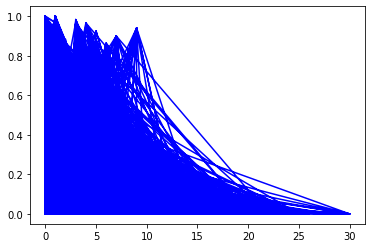

In [115]:
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  """Entry point for launching an IPython kernel.


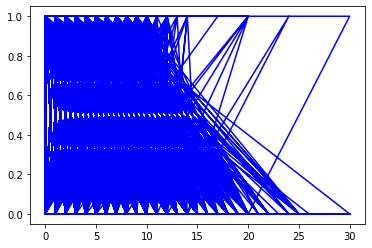

In [116]:
plt.plot(X_train, y_train, color = 'blue')
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  """Entry point for launching an IPython kernel.


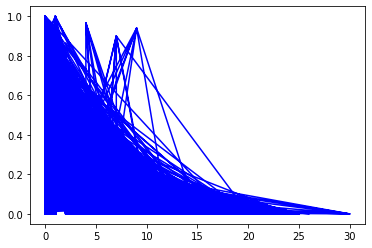

In [117]:
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.show()

In [ ]:
df = pd.DataFrame(pred)
filepath = 'my_sub_ann.xlsx'
df.to_excel(filepath, index=False)